# ΤΕ Δεδομένων - 1η Εργασία


In [1]:
#εισάγετε το σωστό μονοπάτι (και στα αρχεία που φορτώνουμε)
cd ....\scr_sdi1600131

C:\Users\TheoPatsa98\Desktop\Project_ted


In [2]:
#First, we load the training set

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('train2017.tsv', sep='\t',header=None)
dataset.iloc[:,2]=dataset.iloc[:,2].replace("positive",0)
dataset.iloc[:,2]=dataset.iloc[:,2].replace("negative",1)
dataset.iloc[:,2]=dataset.iloc[:,2].replace("neutral",2)
y=dataset.iloc[:,2].values
X=dataset.iloc[:,3].values


# Προεπεξεργασία και καθάρισμα των δεδομένων :

In [3]:
#the text preparation process (it will be used later)

from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

def textPreparation(X,stemFlag):
    listOfTweets = []
    for tweet in X:
        #remove tags
        tweet = re.sub(r"@\S+",'', tweet)
        #remove links
        tweet = re.sub(r"http\S+", '', tweet)
        #remove numbers, punctuation etc
        tweet = re.sub('[^a-zA-Z]', ' ',tweet)
        # convert to lower case
        tweet = tweet.lower()
        tweet = tweet.split()
        # filter out stop words and stem all other words
        stemmer = PorterStemmer()
        stop_words = set(stopwords.words('english')) 
        if stemFlag == 1:
            tweet = [stemmer.stem(word) for word in tweet if not word in stop_words]
        else:
            tweet = [word for word in tweet if not word in stop_words]
        tweet = ' '.join(tweet)
        listOfTweets.append(tweet)
    return listOfTweets


# Ανάλυση των δεδομένων :
<br>
Κατά την ανάλυση των δεδομένων βρίσκουμε ποιες ειναι οι συνηθέστερες λέξεις στο training set και έπειτα βρίσκουμε ποιες είναι οι συνηθέστερες λέξεις για τα positive, negative και neutral tweets αντίστοιχα. Τα αποτελέσματα τα παρουσιάζουμε με word clouds.

In [4]:
#data analysis (prt1): find the most common words in the dataset

def most_common_words(X,Y,number):
    from wordcloud import WordCloud, ImageColorGenerator
    from collections import Counter
    list=[]
    stopwords=[]
    Positivelist=[]
    Negativelist=[]
    Neutrallist=[]
    counter=0
    stop_words=[]
    f=open("stop_words.txt","r")
    for line in f:
        for word in line.split():
            stop_words.append(word)
    for line in X:
        line=line.split()
        for word in line:
            if word not in stop_words:
                list.append(word)
                if Y[counter]==0:
                    Positivelist.append(word)
                if Y[counter]==1:
                    Negativelist.append(word)
                if Y[counter]==2:
                    Neutrallist.append(word)
        counter=counter+1
    comment_words=' '
    for word in list:
        comment_words=comment_words+word+' '
    count = Counter(list)
    countPositive=Counter(Positivelist)
    countNegative=Counter(Negativelist)
    countNeutral=Counter(Neutrallist)
    print("MOST COMMON WORDS:\n")
    print(count.most_common(number))
    print("\n")
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white',min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    
     #data analysis (prt2): find the most common words in each type of tweet (positive, negative or neutral)  
    print("\n\n")
    print("MOST COMMON WORDS IN POSITIVE TWEETS:\n")
    print(countPositive.most_common(number))
    comment_words=' '
    for word in Positivelist:
        comment_words=comment_words+word+' '
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white',min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    print("MOST COMMON WORDS IN NEGATIVE TWEETS:\n")
    print(countNegative.most_common(number))
    print("\n")
    comment_words=' '
    for word in Negativelist:
        comment_words=comment_words+word+' '
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white',min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    print("MOST COMMON WORDS IN NEUTRAL TWEETS:\n")  
    print(countNeutral.most_common(number))
    print("\n")
    comment_words=' '
    for word in Neutrallist:
        comment_words=comment_words+word+' '
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white',min_font_size = 10).generate(comment_words)
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()
    print("\n")  

MOST COMMON WORDS:

[('going', 2091), ('time', 1582), ('game', 1317), ('good', 1030), ('watch', 783), ('pm', 777), ('love', 748), ('amp', 641)]




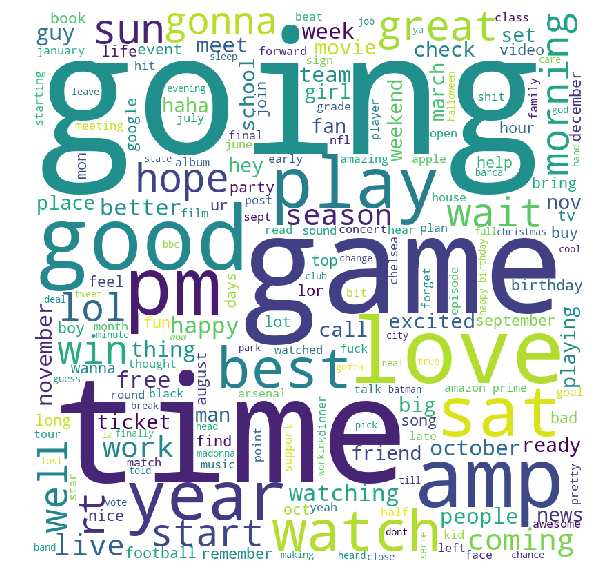




MOST COMMON WORDS IN POSITIVE TWEETS:

[('good', 860), ('going', 825), ('time', 670), ('love', 643), ('game', 525), ('happy', 524), ('best', 507), ('great', 466)]


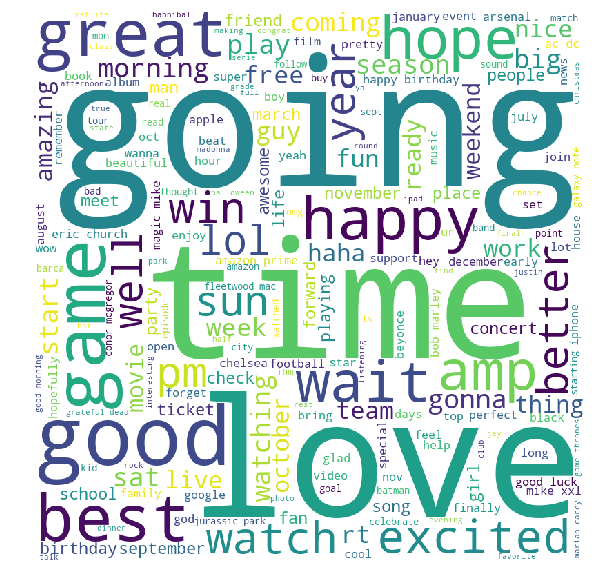

MOST COMMON WORDS IN NEGATIVE TWEETS:

[('going', 318), ('time', 254), ('game', 177), ('sat', 113), ('watch', 111), ('fuck', 108), ('bad', 102), ('shit', 99)]




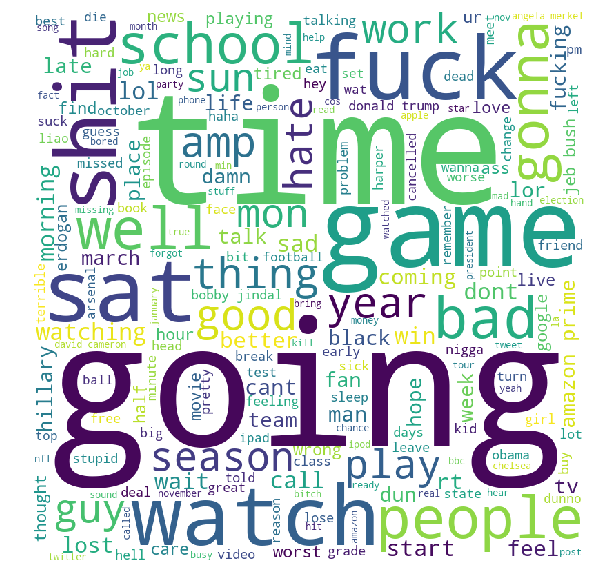

MOST COMMON WORDS IN NEUTRAL TWEETS:

[('going', 948), ('time', 658), ('game', 615), ('pm', 444), ('watch', 315), ('rt', 275), ('sun', 273), ('live', 270)]




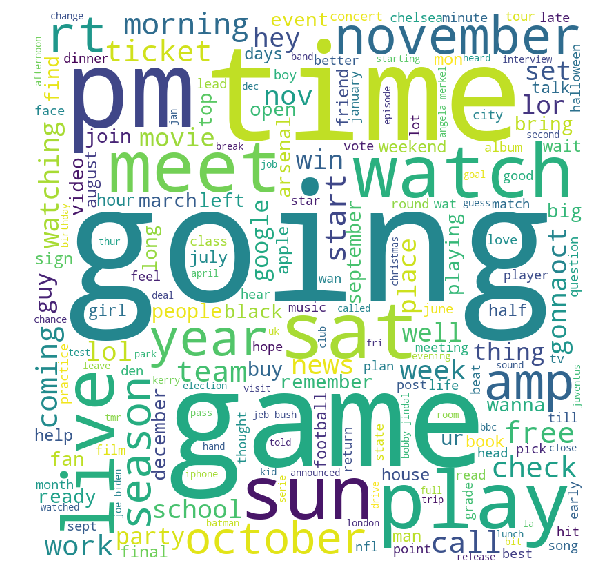

In [5]:
#Let's view the results of the text analysis 
tweets_train = textPreparation(X,0)
most_common_words(tweets_train,y,8)

# Vectorization - εξαγωγή χαρακτηριστικών :

In [6]:
#first, we prepare the training and we load and prepare the test set

#prepare the training_set
tweets_train = textPreparation(X,1)

#prepare the test set
test = pd.read_csv('test2017.tsv', sep='\t',header=None)
X_test = test.iloc[:,3].values
tweets_test = textPreparation(X_test,1)

Bag-of-words :

In [7]:
#creating the Bag of Words model

def createBoW(X,X_test):
    from sklearn.feature_extraction.text import CountVectorizer
    cv = CountVectorizer(max_df=1.0, min_df=1,max_features = 2000)
    bow_train = cv.fit_transform(X)
    bow_test = cv.transform(X_test)
    return [bow_train,bow_test]


#creating BoW model
(bow_train,bow_test) = createBoW(tweets_train,tweets_test)

Tf-idf :

In [8]:
#creating TF-IDF model

def find_tf_idf(X,X_test):
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features = 2000)
    tfidf_train = vectorizer.fit_transform(X)
    tfidf_test = vectorizer.transform(X_test)
    return [tfidf_train,tfidf_test]


#create tf-idf model
(tfidf_train, tfidf_test) = find_tf_idf(tweets_train,tweets_test)

Word Embeddings:

In [16]:
#word embeddings
import warnings
warnings.filterwarnings('ignore')

from gensim.models import Word2Vec

def wordEmb(tweets,tweets_test,w2v_size):
    tokenized_tweets = []
    tokenized_tweets_test=[]
    for tweet in tweets:
        tweet = tweet.split()
        tokenized_tweets.append(tweet)
    
    for tweet in tweets_test:
        tweet = tweet.split()
        tokenized_tweets_test.append(tweet)
    
    model_w2v = Word2Vec(tokenized_tweets,
            size=w2v_size, # desired no. of features/independent variables
            window=5, # context window size
                 min_count=1,
                 sg = 1, # 1 for skip-gram model
                 hs = 0,
                 negative = 10, # for negative sampling
                 workers= 4, # no.of cores
            seed = 34)
    model_w2v.train(tokenized_tweets, total_examples= len(tweets), epochs=35)
    
    w2v_train = np.array([
            np.mean([model_w2v[word] for word in tweet if word in model_w2v]
                    or [np.zeros(w2v_size)], axis=0)
            for tweet in tokenized_tweets
        ])
    
    model_w2v.train(tokenized_tweets_test, total_examples= len(tweets_test), epochs=35)
    
    w2v_test = np.array([
            np.mean([model_w2v[word] for word in tweet if word in model_w2v]
                    or [np.zeros(w2v_size)], axis=0)
            for tweet in tokenized_tweets_test
        ])
    
    return [w2v_train,w2v_test]





#creating word2vec
(w2v_train, w2v_test) = wordEmb(tweets_train, tweets_test , 200)

Προσθήκη Χαρακτηριστικών : 

In [18]:

#using word embeddings with dictionary

def wordEmbDictionary(tweets,w2v,file):
    
    f=open(file,"r",encoding="utf8")
    dir={}
    for line in f:
        line=line.split()
        key=' '.join(word for word in line[:-1])
        dir[key]=float(line[-1])
    line,col=w2v.shape
    average=np.empty([line,1])
    counter=0
    for tweet in tweets:
        sum=0
        tweet = tweet.split()
        if(len(tweet)==0):
            average[counter,0]=0
            counter=counter+1
            continue
        for word in tweet:
            if word in dir:
                sum=sum+dir[word]
            else:
                sum=sum+0
        average[counter,0]=sum/len(tweet)
        counter=counter+1
    w2v=np.insert(w2v,[1],average,axis=1)
    f.close()
    return w2v


w2vD_train = wordEmbDictionary(tweets_train,w2v_train,"affin.txt")
w2vD_test = wordEmbDictionary(tweets_test,w2v_test,"affin.txt")
w2vD_train = wordEmbDictionary(tweets_train,w2vD_train,"generic.txt")
w2vD_test = wordEmbDictionary(tweets_test,w2vD_test,"generic.txt")

# Δοκιμή Ταξινομητών:

Αρχικά, ορίζουμε τη μέθοδο με την οποία θα εκτιμήσουμε την απόδοση του κάθε μοντέλου.
Έπειτα, πρώτα δοκιμάζουμε ταξινομητές με το bag-of-words:

In [9]:
#compute a model's accuracy

def findAccuracy(y_pred):
    from sklearn import metrics
    sem_eval  = open('SemEval.txt', 'r')
    y_eval=[]
    for line in sem_eval:
        line=line.split()
        category=line[1]
        if category=="positive":
            y_eval.append(0)
        elif category=="negative":
            y_eval.append(1)
        elif category=="neutral":
            y_eval.append(2)
    print("Classification report:\n")
    print(metrics.classification_report(y_eval, y_pred))
    print("accuracy score: ")
    print(metrics.accuracy_score(y_eval, y_pred))
    print('\n')

In [11]:
#SVM bow classification
from sklearn.svm import SVC
svm = SVC(kernel='linear', gamma='auto')
svm.fit(bow_train,y)

#predict for the test set
y_predSVM_bow = svm.predict(bow_test)


#KNN bow classification
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(bow_train , y)

#predict for the test set
y_predKNN_bow = knn.predict(bow_test)



In [12]:
#check each classifier's accuracy:

#SVM
print("SVM with bow:")
findAccuracy(y_predSVM_bow)

#KNN
print("KNN with bow:")
findAccuracy(y_predKNN_bow) 


SVM with bow:
Classification report:

              precision    recall  f1-score   support

           0       0.47      0.51      0.49      2375
           1       0.63      0.35      0.45      3972
           2       0.58      0.73      0.65      5937

   micro avg       0.56      0.56      0.56     12284
   macro avg       0.56      0.53      0.53     12284
weighted avg       0.57      0.56      0.55     12284

accuracy score: 
0.564718332790622


KNN with bow:
Classification report:

              precision    recall  f1-score   support

           0       0.33      0.23      0.27      2375
           1       0.45      0.17      0.25      3972
           2       0.51      0.78      0.62      5937

   micro avg       0.48      0.48      0.48     12284
   macro avg       0.43      0.39      0.38     12284
weighted avg       0.45      0.48      0.43     12284

accuracy score: 
0.47753174861608594




Στη συνέχεια, δοκιμάζουμε ταξινομητές με το tf-idf:

In [13]:

#SVM tfidf classification
from sklearn.svm import SVC
svm = SVC(gamma='auto', kernel='linear')
svm.fit(tfidf_train,y)

#predict for the test set
y_predSVM_tfidf = svm.predict(tfidf_test)



#KNN tfidf classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(tfidf_train , y)

#predict for the test set
y_predKNN_tfidf = knn.predict(tfidf_test)

In [14]:
#check each classifier's accuracy:

#SVM
print("SVM with tf-idf:")
findAccuracy(y_predSVM_tfidf)

#KNN
print("KNN with tf-idf:")
findAccuracy(y_predKNN_tfidf) 

SVM with tf-idf:
Classification report:

              precision    recall  f1-score   support

           0       0.47      0.54      0.50      2375
           1       0.67      0.30      0.41      3972
           2       0.57      0.76      0.65      5937

   micro avg       0.57      0.57      0.57     12284
   macro avg       0.57      0.53      0.52     12284
weighted avg       0.59      0.57      0.55     12284

accuracy score: 
0.5664278736567894


KNN with tf-idf:
Classification report:

              precision    recall  f1-score   support

           0       0.34      0.19      0.24      2375
           1       0.41      0.09      0.15      3972
           2       0.49      0.83      0.62      5937

   micro avg       0.47      0.47      0.47     12284
   macro avg       0.41      0.37      0.34     12284
weighted avg       0.44      0.47      0.39     12284

accuracy score: 
0.4674373168349072




Έπειτα, δοκιμάζουμε ταξινομητές με τα word embeddings:

In [19]:
#SVM word embeddings classification

from sklearn.svm import SVC
svm = SVC(kernel='linear', gamma='auto')
svm.fit(w2v_train,y)

#predict for the test set 
y_predSVM_emb = svm.predict(w2v_test)


#KNN word embeddings classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(w2v_train,y)

#predict for the test set
y_predKNN_emb = knn.predict(w2v_test)

In [20]:
#check each classifier's accuracy:

#SVM
print("SVM with word embeddings:")
findAccuracy(y_predSVM_emb)

#KNN
print("KNN with word embeddings:")
findAccuracy(y_predKNN_emb)

SVM with word embeddings:
Classification report:

              precision    recall  f1-score   support

           0       0.48      0.44      0.46      2375
           1       0.53      0.49      0.51      3972
           2       0.57      0.62      0.60      5937

   micro avg       0.54      0.54      0.54     12284
   macro avg       0.53      0.52      0.52     12284
weighted avg       0.54      0.54      0.54     12284

accuracy score: 
0.5432269619016606


KNN with word embeddings:
Classification report:

              precision    recall  f1-score   support

           0       0.31      0.77      0.45      2375
           1       0.57      0.41      0.48      3972
           2       0.60      0.37      0.46      5937

   micro avg       0.46      0.46      0.46     12284
   macro avg       0.50      0.52      0.46     12284
weighted avg       0.54      0.46      0.46     12284

accuracy score: 
0.45799413871703026




Tέλος, δοκιμάζουμε ταξινομητές με το διάνυσμα στο οποίο έχουν προστεθεί τα features από τα λεξικά.


In [ ]:
#SVM word embeddings and directories classification

from sklearn.svm import SVC
svm = SVC(kernel='linear', gamma='auto')
svm.fit(w2vD_train,y)

#predict for the test set
y_predSVM_dir = svm.predict(w2vD_test)


#KNN word embeddings and directories classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(w2vD_train,y)

#predict for the test set
y_predKNN_dir = knn.predict(w2vD_test)

In [ ]:
#check each model's accuracy:

#SVM
print("SVM with word embeddings and directories:")
findAccuracy(y_predSVM_dir)

#KNN
print("KNN with word embeddings and directories:")
findAccuracy(y_predKNN_dir)

# Τελική σύγκριση - συμπεράσματα :
<br>
<br>
Απόδοση των ταξινομητών κατά φθίνουσα σειρά με βάση το f1-score(με average = macro):
  
    1. SVM σε word-embeddings με features από λεξικά (0.55)
    2. SVM σε bag-of-words (0.53)
    3. SVM σε word-embeddings (0.52)
    4. SVM σε tf-idf (0.52)
    5. KNN σε word-embeddings με features από λεξικά (0.50)
    6. KNN σε word embeddings (0.46)
    7. KNN σε bag-of-words (0.38)
    8. KNN σε tf-idf (0.34)
    
    
   Συμπεράσματα: 
    
 Είναι φανερό ότι ανεξαρτήτως της φύσης των χαρακτηριστικών ο ταξινομητής SVM αποδίδει καλύτερα από τον ταξινομητή ΚΝΝ. Σε ορισμένες περιπτώσεις η απόδοση του ΚΝΝ βελτιώνεται ελαφρώς με την αύξηση των γειτόνων που εξετάζονται. Σε κάποιες άλλες(bag-of-words, tf-idf) αυτό δεν ισχύει.
 
 
Eπίσης, ο καλύτερος συνδυασμός ειναι ο SVM όταν δοκιμάζεται στο διάνυσμα στο οποίο έχουμε προσθέσει τα features από τα λεξικά.


Γενικά, μπορούμε εύκολα να παρατηρήσουμε μέσω των αποτελεσμάτων του classification_report που γίνεται έπειτα από τη δοκιμή του κάθε ταξινομητή σε κάθε μοντέλο χαρακτηριστικών ότι οι ταξινομητές δυσκολεύονται περισσότερο κατά την ταξινόμηση των tweets που ανήκουν στην κατηγορία positive.

Σημείωση: Στο word embeddings με 300 features ο SVM απέδιδε λίγο καλύτερα (f1-score-macro = 0.55) αλλά ο KNN χειρότερα (f1 = 0.43).